# Partie 1 : Reconnaissance d'Images avec les Réseaux de Neurones Convolutifs (CNN)

## 1.1. Contexte et Objectifs
La première parite vous plonge au coeur de la vision par ordinateur. Les Réseaux de Neurones Convolutifs (CNN) sont la solution élégante aux problèmes de traitement d'image, car ils apprennent une hiérarchie de caractéristiques en préservant l'information spatiale, contrairement aux réseaux de neurones denses classiques.
À la fin de ce module, votre objectif sera de :
- Maîtriser le pipeline complet d'un projet de classification d'images.
- Comprendre le rôle des couches fondamentales d'un CNN : `Conv2D` et `MaxPooling2D`.
- Construire, compiler et entraîner un modèle séquentiel simple avec Keras.
- Interpréter les métriques de performance et analyser une matrice de confusion.

In [1]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2025-07-04 13:57:25.244559: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-04 13:57:25.355232: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-04 13:57:25.423399: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751630245.505785    7904 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751630245.527019    7904 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751630245.673038    7904 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

## 1.2. Le Jeu de Données : CIFAR-10
Pour cet exercice, pourriez-vous utiliser le jeu de données CIFAR-10 ? Il s'agit d'un standard pour l'apprentissage des CNNs, contenant 60 000 images couleur de 32x32 pixels réparties en 10 classes (avion, voiture, oiseau, etc.). Il est suffisamment complexe pour être intéressant, mais assez petit pour s'entraîner rapidement sur un GPU de Colab.

## 1.3. Étapes d’implémentation

### 1.3.1 : Chargement et Exploration des Données
Votre première tâche sera de charger et d'explorer les données. Pourriez-vous commencer par importer les bibliothèques nécessaires et charger le jeu de données CIFAR-10 (datasets.cifar10 via tensorflow.keras) ?

Capture d’écran n°1 : Vous montrerez une image du dataset via matplotlib.pyplot

In [2]:
# CIFAR-10 depuis Tensorflow
from tensorflow.keras.datasets import cifar10

(images_train, labels_train), (images_test, labels_test) = cifar10.load_data()

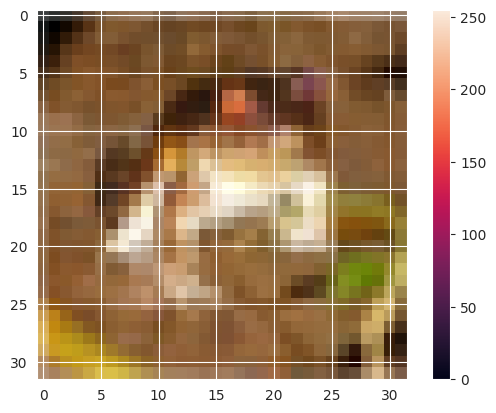

In [3]:
plt.figure()
plt.imshow(images_train[0])
plt.colorbar()  # Barre de couleur pour voir l'échelle des valeurs
plt.show()

### 1.3.2 : Prétraitement des Données
Maintenant, pourriez-vous préparer les données pour l'entraînement?
- Normalisation :
  Les valeurs des pixels doivent être ramenées dans l'intervalle [0;1] . La méthode la plus simple est de diviser par 255.0.
- Encodage des Labels :
  Les labels sont des entiers. Pour une classification multi-classe, il est souvent préférable de les convertir en vecteurs "one-hot".
Note : Si vous ne faites pas d'encodage one-hot, vous utiliserez `sparse_categorical_crossentropy` comme fonction de perte, ce qui est plus simple et efficace en mémoire.

In [4]:
# Ramener les pixels entre 0 et 1 (Normalisation)
images_train = images_train / 255.0
images_test = images_test / 255.0

In [5]:
# Encodage des labels
# Catégories CIFAR-10
categories_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(f"Classes: {categories_names}")

# Conversion en vecteurs one-hot
labels_train_onehot = tf.keras.utils.to_categorical(labels_train, 10)
labels_test_onehot = tf.keras.utils.to_categorical(labels_test, 10)

Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


### 1.3.3 : Construction de l'Architecture CNN
Le coeur de l'exercice est la construction du modèle. Pourriez-vous construire un modèle séquentiel Keras avec la structure suivante :
1. Une base convolutive pour l'extraction de caractéristiques, composée de couches `Conv2D` et `MaxPooling2D` avec une fonction d’activation relu :
    1. Couche `Conv2D((filters = 32, kernel_size =(3, 3), input_size =(#TODO à préciser))`
    2. Couche `MaxPool2D(pool_size=(2, 2))`
    3. Couche `Conv2D((filters = 64,kernel_size=(3, 3), input_size =(#TODO à préciser))`
    4. Couche `MaxPool2D(pool_size=(2, 2))`
    5. Couche `Conv2D((filters = 64,kernel_size=(3, 3), input_size =(#TODO à préciser))`
2. Un classifieur au-dessus, composé de couches Flatten et Dense :
    1. Couche Flatten
    2. Dense avec 64 neurones
    3. Dense avec 10 neurones

In [6]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

2025-07-04 13:57:31.003432: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


### 1.3.4 : Callbacks, Compilation et Entraînement
Avant l'entraînement, il est judicieux de définir des callbacks. Pourriez-vous en configurer deux que sont le `ModelCheckpoint` et le `EarlyStopping` ?
Maintenant, compilez et entraînez le modèle

Capture d’écran n°2 : Image de l’entraînement (console ou autre)

In [7]:
# Définition des Callbacks
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('./checkpoint.model.keras')
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",  # On surveille val_loss
    patience=2  # Arrêt si pas d'amélioration pendant 2 époques
)

# Configuration du modèle pour l'entraînement
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Entraînement du modèle
model.fit(images_train,
          labels_train_onehot,
          epochs=10,  # Maximum 10 passages sur toutes les données
          validation_split=0.1,  # 10% des données pour la validation
          callbacks=[model_checkpoint, early_stopping])

Epoch 1/10


2025-07-04 13:57:31.973010: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 552960000 exceeds 10% of free system memory.


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.3592 - loss: 1.7414 - val_accuracy: 0.5644 - val_loss: 1.2564
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.5786 - loss: 1.1938 - val_accuracy: 0.6460 - val_loss: 1.0275
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.6443 - loss: 1.0136 - val_accuracy: 0.6724 - val_loss: 0.9538
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.6756 - loss: 0.9205 - val_accuracy: 0.6886 - val_loss: 0.9063
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7146 - loss: 0.8158 - val_accuracy: 0.6676 - val_loss: 0.9495
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7360 - loss: 0.7575 - val_accuracy: 0.7218 - val_loss: 0.8274
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.7547 - loss: 0.6979 - val_accuracy: 0.7006 - val_loss: 0.8758
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7747 - loss: 0.64

### 1.3.5 : Évaluation et Analyse
Enfin, évaluez la performance de votre modèle (via model.evaluate) ; grace à model.history, mettez dans 1 graphe l’accuracy et la val accuracy, dans un second la loss et la validation loss.

Capture d’écran n°3 : Chacun des graphes

Test accuracy: 0.7000
Test loss: 0.8695


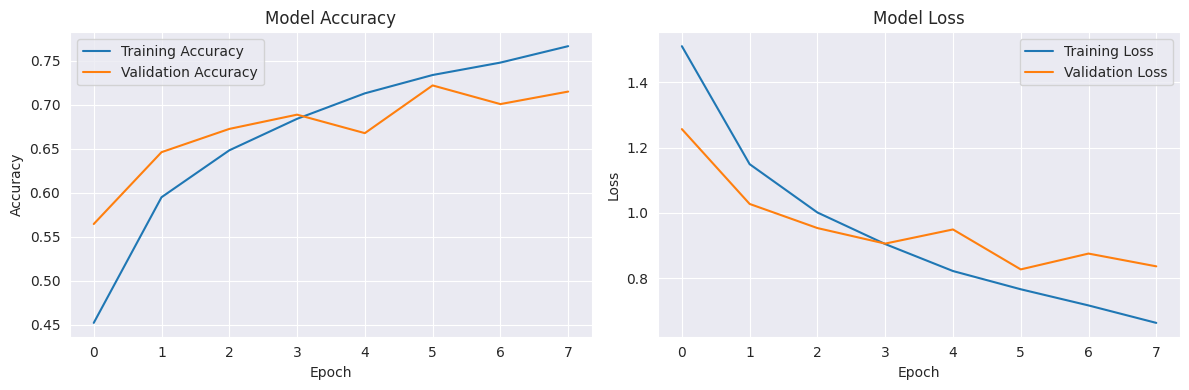

In [8]:
# Évaluation du modèle
test_loss, test_accuracy = model.evaluate(images_test, labels_test_onehot, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Graphiques de l'historique d'entraînement
plt.figure(figsize=(12, 4))

# Graphique 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(model.history.history['accuracy'], label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Graphique 2: Loss
plt.subplot(1, 2, 2)
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### 1.3.6 Matrice de confusion
Faites vos recherches sur la matrice de confusion et mettez la en place pour le modèle.

Capture d’écran n°4 : Affichage de la matrice de confusion dans la console

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


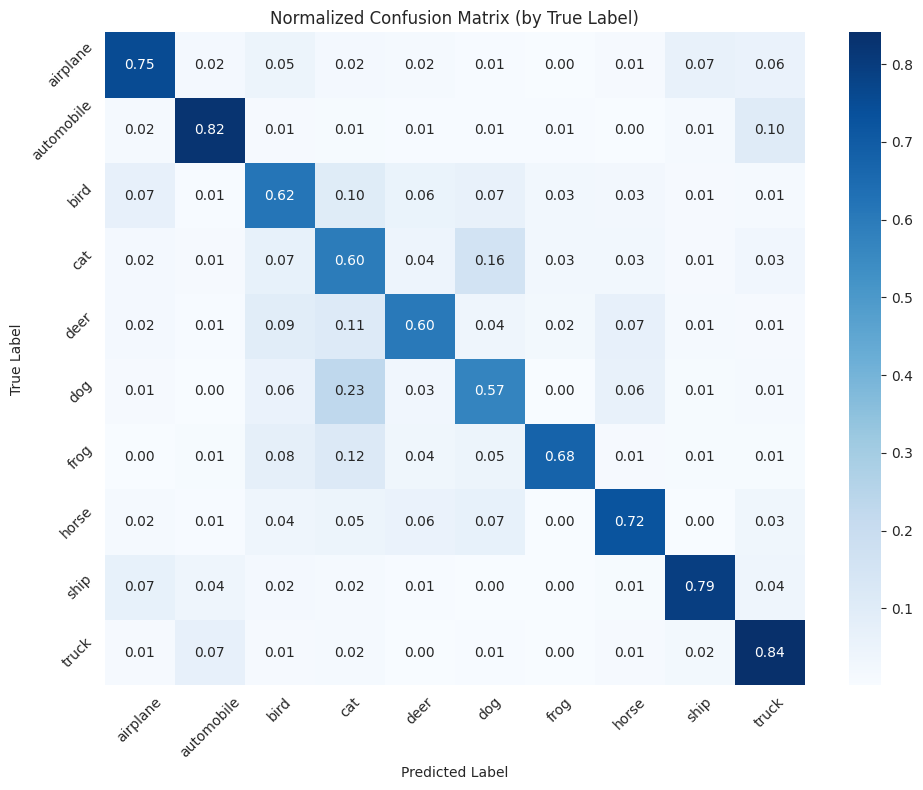

In [10]:
# Predictions
labels_prediction = model.predict(images_test)
labels_prediction = np.argmax(labels_prediction, axis=1)
labels_test_int = np.argmax(labels_test_onehot, axis=1)

# Classes CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Confusion matrix
cm = confusion_matrix(labels_test_int, labels_prediction)

# Confusion matrix normalisée
cm_normalized = confusion_matrix(labels_test_int, labels_prediction, normalize='true')
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Normalized Confusion Matrix (by True Label)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

### 1.3.7 Ouverture : Apprentissage par Transfert (Transfer Learning)
Le modèle que vous avez construit est une excellente base, mais pour atteindre des performances de pointe, surtout avec des données limitées, la technique de référence est l'apprentissage par transfert. L'idée est de réutiliser un modèle déjà entraîné sur un immense jeu de données (comme ImageNet) et de l'adapter à notre tâche spécifique.

Votre prochaine mission est d'appliquer cette technique.
1. Charger un modèle pré-entraîné : Utilisez un modèle comme `MobileNetV2` de `tf.keras.applications`, sans sa couche de classification (`include_top=False`).
2. Geler la base convolutive : Rendez les poids du modèle pré-entraîné non entraînables (`base_model.trainable = False`) pour utiliser le modèle comme un extracteur de caractéristiques fixe.
3. Ajouter une nouvelle tête de classification : Empilez vos propres couches `Dense` au-dessus de la base gelée.
4. Entraîner le nouveau modèle : Seuls les poids de votre tête de classification seront mis à jour.

In [11]:
# Transfer Learning avec MobileNetV2
pre_trained_model = tf.keras.applications.MobileNetV2(include_top=False, input_shape=(32, 32, 3))

# Geler la base convolutive
pre_trained_model.trainable = False

# Nouveau modèle avec couches Dense personnalisées
newModel = tf.keras.Sequential([
    pre_trained_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

my_optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)

# Afficher le résumé
newModel.summary()

# Compilation
newModel.compile(
    optimizer=my_optimizer,
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Entraînement du modèle
newModel.fit(
    images_train,
    labels_train_onehot,
    epochs=20,
    validation_split=0.1,
    callbacks=[model_checkpoint, early_stopping]
)

/tmp/ipykernel_7904/1120049382.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  pre_trained_model = tf.keras.applications.MobileNetV2(include_top=False, input_shape=(32, 32, 3))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1, 1, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,340,618 (8.93 MB)

 Trainable params: 82,634 (322.79 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/20


2025-07-04 13:59:51.981139: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 552960000 exceeds 10% of free system memory.


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.2770 - loss: 1.9697 - val_accuracy: 0.3386 - val_loss: 1.8270
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.3342 - loss: 1.8180 - val_accuracy: 0.3380 - val_loss: 1.8030
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.3475 - loss: 1.7861 - val_accuracy: 0.3460 - val_loss: 1.7959
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.3579 - loss: 1.7584 - val_accuracy: 0.3502 - val_loss: 1.8127
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.3658 - loss: 1.7440 - val_accuracy: 0.3438 - val_loss: 1.8031


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


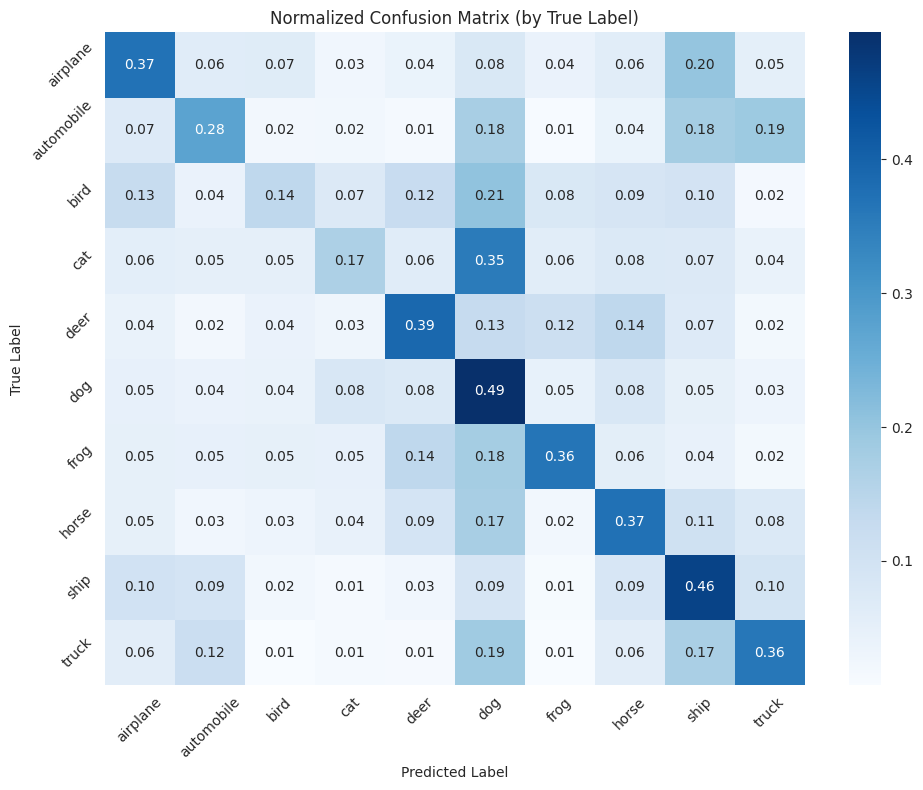

In [12]:
# Predictions
labels_prediction = newModel.predict(images_test)
labels_prediction = np.argmax(labels_prediction, axis=1)
labels_test_int = np.argmax(labels_test_onehot, axis=1)

# Classes CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Confusion matrix
cm = confusion_matrix(labels_test_int, labels_prediction)

# Confusion matrix normalisée
cm_normalized = confusion_matrix(labels_test_int, labels_prediction, normalize='true')
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Normalized Confusion Matrix (by True Label)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

### 1.3.8 Tensorboard
Faites vos recherches pour utiliser Tensorboard avec votre CNN et mettez le en place.

Indications :

- Ajouter le `Callback` TensorBoard dans votre script d'entraînement.
- Lancer l'entraînement pour générer les fichiers de log.
- Démarrer TensorBoard depuis un terminal pour visualiser les résultats.

Capture d’écran n°8 : Affichage de Tensorboard

In [13]:
import datetime
import os

# Créer un dossier pour les logs TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
os.makedirs(log_dir, exist_ok=True)

# Callback TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,  # Enregistrer les histogrammes des poids
    write_graph=True,  # Enregistrer le graphe du modèle
    write_images=True,  # Enregistrer les images de validation
    update_freq='epoch'  # Mettre à jour à chaque époque
)

# Entraînement avec TensorBoard sur le modèle CNN simple
model_tensorboard = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilation du modèle
model_tensorboard.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Entraînement avec TensorBoard
history_tensorboard = model_tensorboard.fit(
    images_train,
    labels_train_onehot,
    epochs=5,  # Réduit pour demo
    validation_split=0.1,
    callbacks=[tensorboard_callback],
    verbose=1
)

print("Pour lancer TensorBoard, exécutez dans un terminal :")
print(f"tensorboard --logdir {log_dir}  --bind_all")
print("Puis ouvrez http://localhost:6006 dans votre navigateur")

Epoch 1/5


2025-07-04 14:01:54.954983: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 552960000 exceeds 10% of free system memory.


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.3370 - loss: 1.7922 - val_accuracy: 0.5256 - val_loss: 1.3422
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.5628 - loss: 1.2278 - val_accuracy: 0.6294 - val_loss: 1.0772
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.6253 - loss: 1.0658 - val_accuracy: 0.6610 - val_loss: 0.9798
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.6657 - loss: 0.9492 - val_accuracy: 0.6748 - val_loss: 0.9398
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.6902 - loss: 0.8797 - val_accuracy: 0.6830 - val_loss: 0.9088
Pour lancer TensorBoard, exécutez dans un terminal :
tensorboard --logdir logs/fit/20250704-140154  --bind_all
Puis ouvrez http://localhost:6006 dans votre navigateur


### 1.3.9 Tests des combinaisons possibles d’hyper-paramètres
Nous allons construire un script qui teste pour notre dernier modèle systématiquement les différentes combinaisons d'hyperparamètres suivantes :
- les optimizers : Adam, SGD with momentum ou Adamax,
- les epochs : 20 à 60 avec un pas de 10,
- le learning rate : 5 valeurs pertinentes que vous choisirez, par exemple : (0,01, ; 0,03 ; 0,05 ; 0,001 ; 0,005) (ces valeurs sont verront changées par `LearningRateScheduler` si vous le mettez en place)

et pour lesquels on affichera les métriques décidées. Pour cela, voici les étapes à faire :
1. Définir une fonction pour créer le dernier modèle avec les paramètres modifiés
2. (Optionnel) Ajouter des métriques supplémentaires lors de la compilation (model.compile à modifier dans la partie metrics)
3. Utiliser des fonctions callbacks adaptés (`EarlyStopping`, `ModelCheckpoint`, `LearningRateScheduler`, `TensorBoard`)
4. Parcourir en boucle toutes les combinaisons d'hyperparamètres demandées.
5. Stocker les résultats, les afficher dans un DataFrame Pandas, et trier pour montrer le top 10 selon la test_loss.
6. Faites moi des analyses supplémentaires (e.g. dans le top50, quel est le meilleur optimizer, learning rate et nb d’epochs ; cb de fois l’optimizer Adam est utilisée


Capture d’écran n°9 : Affichage du tableau de comparaison

In [ ]:
import pandas as pd

param_optimizers = [
    tf.keras.optimizers.Adam,
    tf.keras.optimizers.SGD,
    tf.keras.optimizers.Adamax,
]

param_epochs = [x for x in range(20, 70, 10)]

param_learning_rates = [
    .01,
    .03,
    .05,
    .005,
    .001,
]

def create_model(param_optimizer: tf.keras.optimizers.Optimizer, param_epoch: int, param_learning_rate: float) -> tf.keras.models.Model:
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(32, 32, 3)),
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=param_optimizer(learning_rate=param_learning_rate),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy']  # Simplifié pour éviter les erreurs
    )

    # Callbacks
    tmp_dir = "tmp/checkpoint/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    os.makedirs(tmp_dir, exist_ok=True)
    local_callback_model_checkpoint = tf.keras.callbacks.ModelCheckpoint(tmp_dir + '/checkpoint.model.keras')
    local_callback_early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=3,
        restore_best_weights=True
    )
    
    # Fonction scheduler corrigée pour retourner un float Python
    def scheduler(epoch, lr):
        if epoch < 10:
            return float(lr)  # Conversion explicite en float
        else:
            return float(lr * np.exp(-0.1))  # Utilise numpy au lieu de tf.keras.ops
    
    local_callback_learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)
    
    # Entraînement du modèle
    history = model.fit(
        images_train,
        labels_train_onehot,
        epochs=param_epoch,
        validation_split=0.1,
        callbacks=[
            local_callback_model_checkpoint,
            local_callback_early_stopping,
            local_callback_learning_rate_scheduler,
        ],
        verbose=0  # Réduire la verbosité pour éviter trop de sortie
    )
    
    return model, history

# Liste pour stocker les résultats de chaque modèle
results_list = []

print("Début du test des combinaisons d'hyperparamètres...")
print(f"Total de combinaisons à tester: {len(param_optimizers) * len(param_epochs) * len(param_learning_rates)}")

combination_count = 0
for param_optimizer in param_optimizers:
    for param_epoch in param_epochs:
        for param_learning_rate in param_learning_rates:
            combination_count += 1
            print(f"Test {combination_count}: {param_optimizer.__name__}, epochs={param_epoch}, lr={param_learning_rate}")
            
            try:
                trained_model, history = create_model(param_optimizer, param_epoch, param_learning_rate)

                # Évaluation finale du modèle sur les données de test
                evaluation_results = trained_model.evaluate(images_test, labels_test_onehot, verbose=0)
                test_loss = evaluation_results[0]
                test_acc = evaluation_results[1]

                # Stockage des résultats dans la liste
                results_list.append({
                    'optimizer': param_optimizer.__name__,
                    'learning_rate': param_learning_rate,
                    'epochs': param_epoch,
                    'test_loss': test_loss,
                    'test_accuracy': test_acc,
                    'final_epoch': len(history.history['loss']),  # Nombre d'époques réellement exécutées
                    'best_val_loss': min(history.history['val_loss']),
                    'best_val_accuracy': max(history.history['val_accuracy'])
                })

                print(f"  Résultat: Acc={test_acc:.4f}, Loss={test_loss:.4f}")

            except Exception as e:
                print(f"  Erreur: {str(e)}")
                # Ajouter un résultat d'erreur pour traçabilité
                results_list.append({
                    'optimizer': param_optimizer.__name__,
                    'learning_rate': param_learning_rate,
                    'epochs': param_epoch,
                    'test_loss': float('inf'),
                    'test_accuracy': 0.0,
                    'final_epoch': 0,
                    'best_val_loss': float('inf'),
                    'best_val_accuracy': 0.0
                })

            # Nettoyage mémoire
            if 'trained_model' in locals():
                del trained_model
            tf.keras.backend.clear_session()

# Création du DataFrame avec les résultats
results = pd.DataFrame(results_list)

# Filtrer les résultats valides (sans erreurs)
valid_results = results[results['test_loss'] != float('inf')]

print(f"\n=== RÉSULTATS VALIDES: {len(valid_results)}/{len(results)} ===")
if len(valid_results) > 0:
    print(valid_results.to_string(index=False))

    # TOP 10 selon test_loss (plus faible est mieux)
    print("\n=== TOP 10 MODÈLES (selon test_loss) ===")
    top_10 = valid_results.nsmallest(10, 'test_loss')
    print(top_10.to_string(index=False))

    # Affichage du meilleur modèle
    best_model = valid_results.loc[valid_results['test_loss'].idxmin()]
    print(f"\n=== MEILLEUR MODÈLE ===")
    print(f"Optimiseur: {best_model['optimizer']}")
    print(f"Learning Rate: {best_model['learning_rate']}")
    print(f"Epochs: {best_model['epochs']}")
    print(f"Précision: {best_model['test_accuracy']:.4f}")
    print(f"Perte: {best_model['test_loss']:.4f}")
    print(f"Époque finale: {best_model['final_epoch']}")

    # Analyses supplémentaires
    print("\n=== ANALYSES SUPPLÉMENTAIRES ===")

    # TOP 50 pour analyses (ou tous si moins de 50)
    top_n = min(50, len(valid_results))
    top_50 = valid_results.nsmallest(top_n, 'test_loss')

    # Meilleur optimizer dans le TOP N
    optimizer_counts = top_50['optimizer'].value_counts()
    print(f"Répartition des optimizers dans le TOP {top_n}:")
    for optimizer, count in optimizer_counts.items():
        print(f"  {optimizer}: {count} fois ({count/top_n*100:.1f}%)")

    # Meilleur learning rate dans le TOP N
    lr_analysis = top_50.groupby('learning_rate')['test_loss'].mean().sort_values()
    print(f"\nMeilleur learning rate (moyenne test_loss dans TOP {top_n}):")
    for lr, avg_loss in lr_analysis.items():
        print(f"  {lr}: {avg_loss:.4f}")

    # Meilleur nb d'epochs dans le TOP N
    epochs_analysis = top_50.groupby('epochs')['test_loss'].mean().sort_values()
    print(f"\nMeilleur nb d'epochs (moyenne test_loss dans TOP {top_n}):")
    for epochs, avg_loss in epochs_analysis.items():
        print(f"  {epochs}: {avg_loss:.4f}")

    # Combien de fois Adam est utilisé
    adam_count = valid_results[valid_results['optimizer'] == 'Adam'].shape[0]
    total_count = valid_results.shape[0]
    print(f"\nOptimizer Adam utilisé {adam_count} fois sur {total_count} ({adam_count/total_count*100:.1f}%)")

    adam_in_top_n = top_50[top_50['optimizer'] == 'Adam'].shape[0]
    print(f"Adam dans le TOP {top_n}: {adam_in_top_n} fois sur {top_n} ({adam_in_top_n/top_n*100:.1f}%)")

else:
    print("Aucun résultat valide obtenu. Vérifiez les paramètres du modèle.")

print(f"\nNombre d'erreurs rencontrées: {len(results) - len(valid_results)}")

Début du test des combinaisons d'hyperparamètres...
Total de combinaisons à tester: 75
Test 1: Adam, epochs=20, lr=0.01


## P1 Questions pour le rapport :
1. Quel a été le rôle des callbacks `ModelCheckpoint` et `EarlyStopping` ? Ont-ils été utiles pendant votre entraînement ?
2. Analysez les courbes d'apprentissage (perte et précision). Votre modèle présente-t-il des signes de sur-apprentissage ou de sous-apprentissage ? Comment la matrice de confusion vous aide-t-elle à comprendre les erreurs du modèle ?
3. Quels ont été les principaux défis rencontrés ? Comment pourriez-vous améliorer les performances de ce premier modèle ?
4. Comparez les performances (précision, temps d'entraînement) du modèle simple et du modèle basé sur le transfert d'apprentissage. Pourquoi observe-t-on une telle différence ?